# True Price App EDA
The purpose of this analysis is to clearly analyze & show the difference in price between vehicles in different conditions, while also exploring the distribution of prices between manufacturers. The data will be visualized using histograms.

In [208]:
# import libraries & read csv file
import pandas as pd
from matplotlib import pyplot as plt
import plotly.express as px
import numpy as np


vehicles = pd.read_csv('../vehicles_us.csv')

In [209]:
# print a sample of the dataset to find any obvious issues
vehicles.sample(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
1525,7995,2015.0,ford fusion se,excellent,4.0,gas,63507.0,automatic,sedan,black,NaN,2018-09-19,51
47145,26000,2015.0,ford mustang gt coupe 2d,good,8.0,gas,39274.0,other,coupe,black,NaN,2019-04-05,27
4908,29990,2015.0,chevrolet silverado 1500,excellent,8.0,gas,71656.0,automatic,pickup,NaN,1.0,2018-11-28,21
33808,5500,2002.0,ford f-150,like new,NaN,gas,114000.0,automatic,mini-van,green,NaN,2018-12-09,37
8695,2195,2014.0,chevrolet suburban,excellent,8.0,gas,NaN,automatic,SUV,black,NaN,2018-09-04,29
34780,18997,2014.0,ford f-150,good,8.0,gas,109772.0,automatic,truck,black,1.0,2018-10-08,43
26507,16199,2010.0,chevrolet tahoe,like new,8.0,gas,104800.0,automatic,SUV,NaN,1.0,2018-07-09,97
35387,11500,2006.0,ram 2500,good,6.0,diesel,226315.0,automatic,truck,red,1.0,2018-08-24,55
25259,38499,2014.0,ram 2500,like new,6.0,diesel,73800.0,automatic,truck,grey,1.0,2018-06-15,23
42929,22995,2019.0,nissan frontier,excellent,6.0,gas,NaN,automatic,pickup,NaN,1.0,2019-04-07,26


In [210]:
# Create 'manufacturer' column
vehicles['manufacturer'] = vehicles['model'].apply(lambda x:x.split()[0])

vehicles.columns

Index(['price', 'model_year', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'transmission', 'type', 'paint_color', 'is_4wd',
       'date_posted', 'days_listed', 'manufacturer'],
      dtype='object')

In [211]:
# check for duplicates
vehicles.duplicated().sum()

0

In [212]:
# check for missing values
vehicles.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
manufacturer        0
dtype: int64

In [213]:
# change missing values in 'is_4wd' to 0
vehicles['is_4wd'] = vehicles['is_4wd'].fillna(0)

vehicles.head(15)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,manufacturer
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,bmw
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,ford
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,hyundai
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,0.0,2019-03-22,9,ford
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,chrysler
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15,chrysler
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73,toyota
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68,honda
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19,kia
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17,honda


In [214]:
# replace missing values in 'paint_color' with 'Unknown'
vehicles['paint_color'] = vehicles['paint_color'].fillna('Unknown')

vehicles.head(15)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,manufacturer
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,Unknown,1.0,2018-06-23,19,bmw
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,ford
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,hyundai
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,Unknown,0.0,2019-03-22,9,ford
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,chrysler
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15,chrysler
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73,toyota
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68,honda
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,Unknown,1.0,2018-07-16,19,kia
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17,honda


In [215]:
# fill missing values  in 'model_year' with the median model_year
vehicles['model_year'] = vehicles['model_year'].fillna(vehicles.groupby(['model'])['model_year'].transform('median'))

vehicles.head(15)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,manufacturer
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,Unknown,1.0,2018-06-23,19,bmw
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,ford
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,hyundai
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,Unknown,0.0,2019-03-22,9,ford
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,chrysler
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15,chrysler
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73,toyota
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68,honda
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,Unknown,1.0,2018-07-16,19,kia
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17,honda


In [216]:
# apply similar logic to fill missing values in 'odometer' with the mean
vehicles['odometer'] = vehicles['odometer'].fillna(vehicles.groupby(['model'])['odometer'].transform('mean'))

#do the same with 'cylinders' with the median
vehicles['cylinders'] = vehicles['cylinders'].fillna(vehicles.groupby(['model'])['cylinders'].transform('median'))

#check for reassurance
vehicles.head(15)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,manufacturer
0,9400,2011.0,bmw x5,good,6.0,gas,145000.000000,automatic,SUV,Unknown,1.0,2018-06-23,19,bmw
1,25500,2011.0,ford f-150,good,6.0,gas,88705.000000,automatic,pickup,white,1.0,2018-10-19,50,ford
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.000000,automatic,sedan,red,0.0,2019-02-07,79,hyundai
3,1500,2003.0,ford f-150,fair,8.0,gas,123588.998738,automatic,pickup,Unknown,0.0,2019-03-22,9,ford
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.000000,automatic,sedan,black,0.0,2019-04-02,28,chrysler
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.000000,automatic,sedan,black,1.0,2018-06-20,15,chrysler
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.000000,automatic,sedan,white,0.0,2018-12-27,73,toyota
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.000000,automatic,SUV,black,1.0,2019-01-07,68,honda
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.000000,automatic,SUV,Unknown,1.0,2018-07-16,19,kia
9,9200,2008.0,honda pilot,excellent,6.0,gas,147191.000000,automatic,SUV,blue,1.0,2019-02-15,17,honda


###### It could be assumed that the average vehicle decreases in value by about 50% by the time it has anywhere from 100k to 150k miles  if not kept in new condition.

In [217]:
# plot 4 histograms showing the difference in price based on condition
plt.figure(figsize=(10, 5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

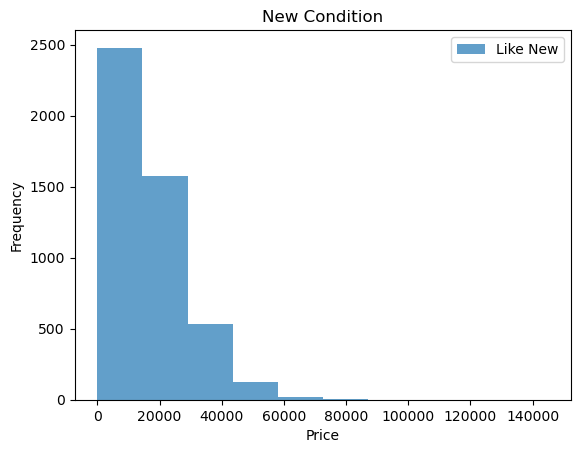

In [218]:
# Like New
plt.hist(vehicles[vehicles['condition'] == 'like new']['price'], bins=10, alpha=0.7, label='Like New')
plt.title('New Condition')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()

plt.show()

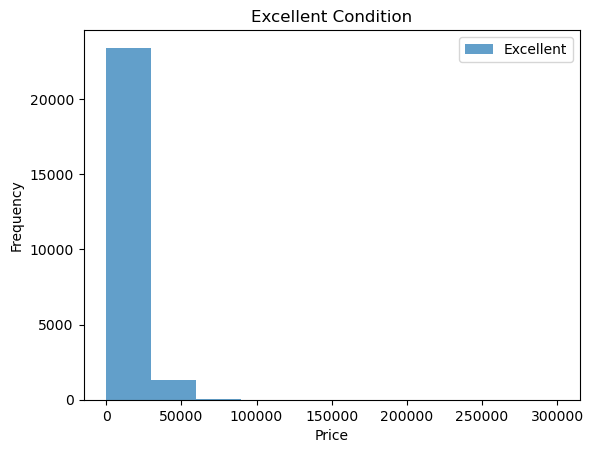

In [219]:
# Excellent
plt.hist(vehicles[vehicles['condition'] == 'excellent']['price'], bins=10, alpha=0.7, label='Excellent')
plt.title('Excellent Condition')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()

plt.show()

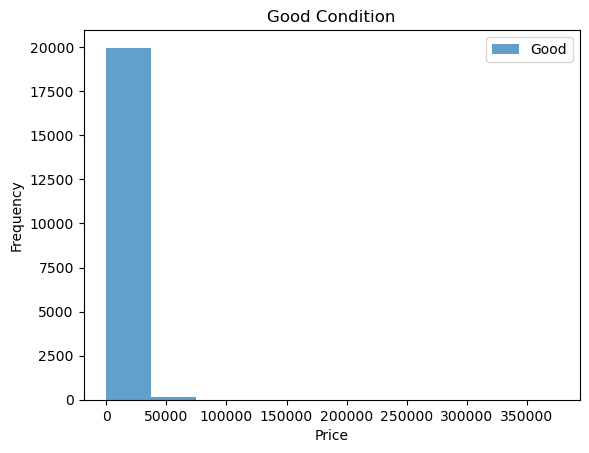

In [220]:
# Good
plt.hist(vehicles[vehicles['condition'] == 'good']['price'], bins=10, alpha=0.7, label='Good')
plt.title('Good Condition')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()

plt.show()

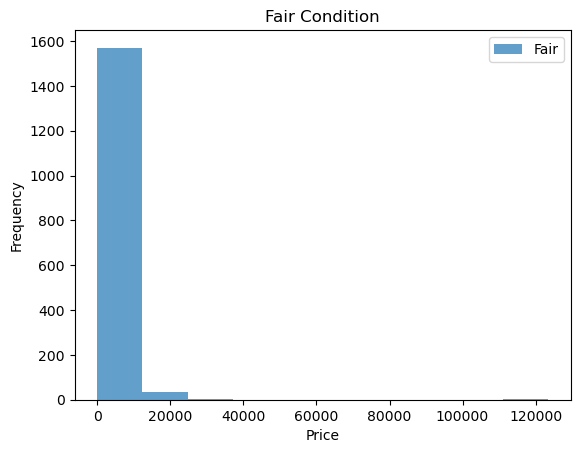

In [ ]:
# Fair
plt.hist(vehicles[vehicles['condition'] == 'fair']['price'], bins=10, alpha=0.7, label='Fair')
plt.title('Fair Condition')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()

plt.show()

###### Regardless of year, transmission type, 4wd capability, body style, fuel type, manufacturer, cylinders, mileage, & length of time listed, it is highly likely that a car in better condition will be more expensive than a care in poorer condition.